<a href="https://colab.research.google.com/github/hemilygomes/dojopython/blob/main/Semana_17_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Para montar o drive e carregar o dataset
from google.colab import drive
drive.mount('/content/drive')
cars = pd.read_csv('/content/drive/MyDrive/colab/cars.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cars.drop(columns=['Unnamed: 0'], inplace=True)
cars.replace("?", np.NaN, inplace=True)
avg_normalized=cars['normalized-losses'].astype('float').mean()
cars['normalized-losses'].replace(np.nan,avg_normalized, inplace=True)

avg_peakrpm=cars['peak-rpm'].astype('float').mean()
cars['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

avg_bore=cars['bore'].astype('float').mean()
cars["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = cars["stroke"].astype("float").mean()
cars["stroke"].replace(np.nan, avg_stroke, inplace = True)

avg_horsepower = cars['horsepower'].astype('float').mean()
cars['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

cars["num-of-doors"].replace(np.NaN, "four", inplace=True)

cars.dropna(subset=["price"], axis=0, inplace=True)
cars.reset_index(drop=True, inplace=True)

cars[["normalized-losses"]] = cars[["normalized-losses"]].astype("int")
cars[["horsepower"]] = cars[["horsepower"]].astype("int")

cars[["price"]] = cars[["price"]].astype("float")
cars[["peak-rpm"]] = cars[["peak-rpm"]].astype("float")

# Podemos indicar várias colunas ao mesmo tempo, quando elas possuírem o mesmo tipo de dado
cars[["bore", "stroke"]] = cars[["bore", "stroke"]].astype("float")

In [ ]:
# Retirado de um livro de 1978
# X = renda
# Y = gasto
dataset_exemplo = {
    'Y': [3111, 1405, 1979, 2754, 2949, 1168, 2992, 2643, 3174,  949, 2284, 3043, 1457, 2855, 2263, 3199, 1700,  453, 1878,  840, 2229, 3402, 2512, 2783, 2615, 2495, 2392, 1100,  700, 1964, 3127, 2078, 2891, 2082, 1000, 2064, 1347, 3167,  800, 1600, 3210, 2744, 1478, 2701, 601, 1392, 2225, 1531, 2360, 1870],
    'X': [ 9819,  3833,  6167,  8950,  8483,  3443,  8612,  8052, 10020, 1737,  6930,  9023,  4205,  9289,  6285, 10102,  4605,  1174, 6030,  2571,  6188,  9817,  7885,  8488,  7290,  7588,  7745, 2205,  2105,  6117,  9007,  5450,  8315,  5767,  2805,  6651, 3005,  9999,  1605,  5105,  8990,  8918,  3551,  7986,  1269, 3506,  6746,  3434,  6753,  4905]
}

### Regressão Linear

In [ ]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
cars.shape

(201, 26)

In [ ]:
amostra = cars[cars['price'] < 8000].sample(n=20, random_state=42)

In [ ]:
amostra.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
amostra[['price', 'peak-rpm', 'stroke', 'horsepower', 'city-mpg', 'highway-mpg', 'engine-size']].cov()

,price,peak-rpm,stroke,horsepower,city-mpg,highway-mpg,engine-size
price,674784.513158,-36517.763158,41.550132,5297.210526,-2631.171053,-2671.381579,6929.684211
peak-rpm,-36517.763158,198546.052632,58.467105,1345.263158,-124.605263,-58.289474,-1381.578947
stroke,41.550132,58.467105,0.038630,0.643158,-0.231974,-0.274605,0.430000
horsepower,5297.210526,1345.263158,0.643158,131.115789,-44.873684,-43.810526,71.473684
city-mpg,-2631.171053,-124.605263,-0.231974,-44.873684,23.292105,22.471053,-42.684211
highway-mpg,-2671.381579,-58.289474,-0.274605,-43.810526,22.471053,23.607895,-46.157895
engine-size,6929.684211,-1381.578947,0.430000,71.473684,-42.684211,-46.157895,126.210526


In [ ]:
amostra[['price', 'peak-rpm', 'stroke', 'horsepower', 'city-mpg', 'highway-mpg', 'engine-size']].corr()

,price,peak-rpm,stroke,horsepower,city-mpg,highway-mpg,engine-size
price,1.000000,-0.099768,0.257351,0.563167,-0.663685,-0.669306,0.750902
peak-rpm,-0.099768,1.000000,0.667601,0.263663,-0.057943,-0.026923,-0.275993
stroke,0.257351,0.667601,1.000000,0.285776,-0.244552,-0.287552,0.194741
horsepower,0.563167,0.263663,0.285776,1.000000,-0.812007,-0.787449,0.555611
city-mpg,-0.663685,-0.057943,-0.244552,-0.812007,1.000000,0.958276,-0.787254
highway-mpg,-0.669306,-0.026923,-0.287552,-0.787449,0.958276,1.000000,-0.845609
engine-size,0.750902,-0.275993,0.194741,0.555611,-0.787254,-0.845609,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


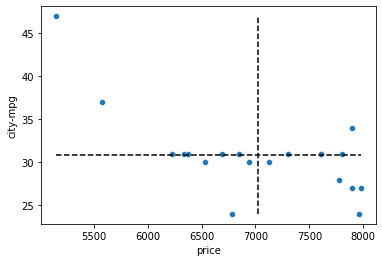

In [ ]:
x = amostra['price']
y = amostra['city-mpg']

ax = sns.scatterplot(x, y)
ax.hlines(y = y.mean(), xmin=x.min(), xmax=x.max(), linestyles='dashed')
ax.vlines(x = x.mean(), ymin=y.min(), ymax=y.max(), linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


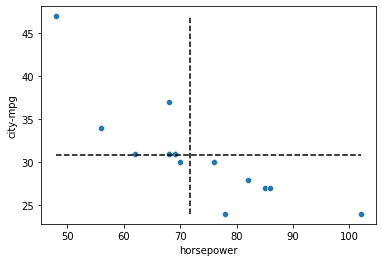

In [ ]:
x = amostra['horsepower']
y = amostra['city-mpg']

ax = sns.scatterplot(x, y)
ax.hlines(y = y.mean(), xmin=x.min(), xmax=x.max(), linestyles='dashed')
ax.vlines(x = x.mean(), ymin=y.min(), ymax=y.max(), linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


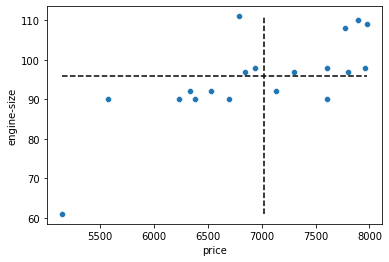

In [ ]:
x = amostra['price']
y = amostra['engine-size']

ax = sns.scatterplot(x, y)

ax.hlines(y = y.mean(), xmin=x.min(), xmax=x.max(), linestyles='dashed')
ax.vlines(x = x.mean(), ymin=y.min(), ymax=y.max(), linestyles='dashed')

In [ ]:
dataset_exemplo

{'X': [9819,
  3833,
  6167,
  8950,
  8483,
  3443,
  8612,
  8052,
  10020,
  1737,
  6930,
  9023,
  4205,
  9289,
  6285,
  10102,
  4605,
  1174,
  6030,
  2571,
  6188,
  9817,
  7885,
  8488,
  7290,
  7588,
  7745,
  2205,
  2105,
  6117,
  9007,
  5450,
  8315,
  5767,
  2805,
  6651,
  3005,
  9999,
  1605,
  5105,
  8990,
  8918,
  3551,
  7986,
  1269,
  3506,
  6746,
  3434,
  6753,
  4905],
 'Y': [3111,
  1405,
  1979,
  2754,
  2949,
  1168,
  2992,
  2643,
  3174,
  949,
  2284,
  3043,
  1457,
  2855,
  2263,
  3199,
  1700,
  453,
  1878,
  840,
  2229,
  3402,
  2512,
  2783,
  2615,
  2495,
  2392,
  1100,
  700,
  1964,
  3127,
  2078,
  2891,
  2082,
  1000,
  2064,
  1347,
  3167,
  800,
  1600,
  3210,
  2744,
  1478,
  2701,
  601,
  1392,
  2225,
  1531,
  2360,
  1870]}

In [ ]:
dataset = pd.DataFrame(dataset_exemplo)

In [ ]:
dataset.head()

,Y,X
0,3111,9819
1,1405,3833
2,1979,6167
3,2754,8950
4,2949,8483


In [ ]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


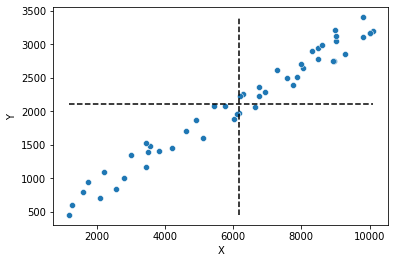

In [ ]:
x = dataset['X']
y = dataset['Y']

ax = sns.scatterplot(x, y)

ax.hlines(y = y.mean(), xmin=x.min(), xmax=x.max(), linestyles='dashed')
ax.vlines(x = x.mean(), ymin=y.min(), ymax=y.max(), linestyles='dashed')

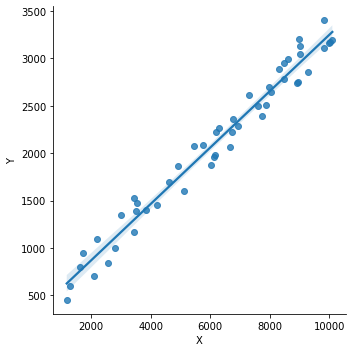

In [ ]:
ax = sns.lmplot(x='X', y='Y', data=dataset)
ax

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Y = dataset['Y']
X = sm.add_constant(dataset['X'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Y.head()

0    3111
1    1405
2    1979
3    2754
4    2949
Name: Y, dtype: int64

In [ ]:
X.head()

,const,X
0,1.0,9819
1,1.0,3833
2,1.0,6167
3,1.0,8950
4,1.0,8483


### Estimando o modelo

In [ ]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

### Na mão

In [ ]:
resultado_regressao.params

const    276.687791
X          0.297291
dtype: float64

In [ ]:
intercept = resultado_regressao.params[0]

In [ ]:
intercept

276.68779122322474

In [ ]:
beta = resultado_regressao.params[1]

In [ ]:
beta

0.2972906909937241

In [ ]:
dataset.head()

,Y,X
0,3111,9819
1,1405,3833
2,1979,6167
3,2754,8950
4,2949,8483


In [ ]:
 dataset['Y_previsto'] = intercept + beta * dataset['X']

In [ ]:
dataset.head()

,Y,X,Y_previsto
0,3111,9819,3195.785086
1,1405,3833,1416.203010
2,1979,6167,2110.079483
3,2754,8950,2937.439476
4,2949,8483,2798.604723


### Com stats model

In [ ]:
 dataset['Y_previsto_statsmodel'] = resultado_regressao.predict() 

In [ ]:
dataset.head()

,Y,X,Y_previsto,Y_previsto_statsmodel
0,3111,9819,3195.785086,3195.785086
1,1405,3833,1416.203010,1416.203010
2,1979,6167,2110.079483,2110.079483
3,2754,8950,2937.439476,2937.439476
4,2949,8483,2798.604723,2798.604723


In [ ]:
def prever(x):
  return intercept + beta * x 

In [ ]:
prever(2500)

1019.9145187075351

In [ ]:
def prever_bonito(x):
  return resultado_regressao.predict([1, x])[0]

In [ ]:
resultado_regressao.predict([1, 2500])[0]

1019.9145187075351

In [ ]:
prever_bonito(3000)

1168.5598642043972